# **Streamline Your Coding Workflow**
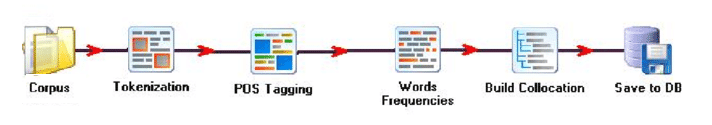


<div class="alert alert-block alert-success">

    
</div>


### **1, Able to run parts of code without needing to rerun the entire script.**
- Put pieces of code in individual cells and run them separately.<br>
- Add, move, merge, split and delete code cells to build up your script piece by piece.<br>
- Collapse the outputs or display the outputs in a separate view.<br>
- Open and view different part of the script in a synced clone file.  <br>
- Write a lot of annotations in between blocks of code (and insert charts and pictures too).<br>
- Run internal and external commands in the cell without leaving the interface. (e.g., pip install, pwd, cd..)

In [ ]:
notes = "Hello, CL group!"    # run some code

In [ ]:
print(notes)          # check results without running the above code again.

Like running Python in an interpreter, you do not need to type print() to display the output of a printable object.

In [ ]:
notes

In [ ]:
notes[7:9]

In [ ]:
import math
print(math.pi)

In [ ]:
math.pi

In [ ]:
"blah..."*10

In [ ]:
pwd   #show current working directory


<div class="alert alert-block alert-info">

</div>

#### Read in text

In [ ]:
# read in a txt file and do some simple clean up
import re
import csv
with open("locness_new.txt", encoding='utf-8-sig', errors='ignore') as f:
        text = f.read().lower()                
        text = re.sub('<.+>\n', '', text)
        text = re.sub('\n', ' ', text) 
        

In [ ]:
print(text)   

#### Split text into word list and caculate tokens.

In [ ]:
text_list = re.split(r'[\s|\']', text)     # split text by white space                  
tokens = len(text_list)

In [ ]:
print(tokens)

In [ ]:
sent_list = re.split(r'[\.|!|?]\s', text)   # split text by sentence end punctuation.

In [ ]:
print(len(sent_list))

In [ ]:
sent_list[0:10]

In [ ]:
tokens/len(sent_list)    # number of words per sentence

#### Pattern extraction example: find "in order + verb + the" phrases in text, extract the phrases and the verbs.

In [ ]:
# use re.DOTALL to find pattern in multiple lines, use () to capture groups, negative lookbehind ?! to exlude "be" 
re.findall(r"(\bin order to\b\s(?!be)(\w+?)\s\bthe\b)", text, re.DOTALL)   

<div class="alert alert-block alert-danger">

    
</div>

#### **2, Use tools to simplify coding**
- Libraries<br>
Example: **TextBlob** [Link to TextBlob Documents](https://textblob.readthedocs.io/en/dev/quickstart.html)<br>
- Plugins<br>
- Modules<br>
Example: **Counter()**

In [ ]:
# run the following commands to install TextBlob and download basic function corpora

!pip install -U textblob
!py -m textblob.download_corpora lite

In [ ]:
from textblob import TextBlob
blob = TextBlob(text)  # Make text into a TextBlob object, then everything starts from there.

**Tokenization, Ngrams, Tagging, Noun Phrase Extraction, Inflection and lemmatization...**: <br>
Use one command to process text into a *word* list, *sentence* list, *n-gram* list, or POS tagging with
the <span style="color:green">TextBlob method. </span> <br>
- blob.words<br>  
- blob.sentences <br>  
- blob.ngrams(n=  )
- blob.tags

In [ ]:
wordCount = len(blob.words)               # Note: 's is considered as a separate word'
sentNum = len(blob.sentences)
wordCount, sentNum

#### Example task: find all 4-word bundles with raw frequency at least 20 

In [ ]:
tetragrams = blob.ngrams(n=4)        # get all 4-grams from text with only one command in TextBlob

In [ ]:
tetragrams[0:15]   # print out 15 items. It shows a 4-gram word list. 

In [ ]:
bundle_list = [' '.join(wrds) for wrds in tetragrams]  # join list into string.

In [ ]:
bundle_list    # print out 10 items in the list

##### What is a "list comprehension"?
In one sentence: "Do this to the element for every element in list_name (optional: if that), and make a new list with the results." 

In [ ]:
# frame_list = [' '.join(wrds) for wrds in tetragrams if wrds[0]=="the" and wrds[2]=="of" and wrds[3]=="the"]
# frame_list

**Counter()** returns a dictionary with key and frquency pairs.  Runs much faster than using a loop to count items and update a dictionary.

In [ ]:
from collections import Counter
bundle_freq = Counter(bundle_list)     # is there a way to get more than frequency in counter moduel? 

In [ ]:
print(bundle_freq)

In [ ]:
Counter(blob.words).most_common(30)   # word frequency. Count() uses the capital C

- Make a bundle dictionary with key value at least 20. 

In [ ]:
bundle_dict = {bd:frq for bd,frq in bundle_freq.items() if frq>=20 }

In [ ]:
bundle_dict

Compare the one-line dictionary comprehension with claiming a dict varible (empty dictionary), writing a loop, and updating the dict variable.

In [ ]:
# frame_dict = {' '.join(re.findall(r"the\s\w+?\sof\s\w+?\b", bd)) :frq for bd,frq in bundle_freq.items() if frq>=20 }
# frame_dict

<div class="alert alert-block alert-warning">

    
</div>

####  **3, View and update outputs**
- Open and display your output file from the file manager pane (e.g., open a .csv file, .txt or .py file).<br>
- Create an *output view*, drag and drop it at bottom or on the side.<br>
- Write results to csv with the same csv file still open (No more <span style="color:red"> "Permission denied"</span> error messages!). <br> 
- You can refresh the browser and see the changes in the opened csv file, or just close and reopen the csv file. <br>


In [ ]:
# The csv Dictwriter is easier to use than the write method.
header = ["4W_bundle", "frequency"]
with open("test_bundle.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames = header)
    writer.writeheader()
   
    for bd in bundle_dict:
        writer.writerow({'4W_bundle':bd, 'frequency': bundle_dict[bd]})        

####  Use the Pandas DataFrame to store outputs
- Jupyter Notebook makes visualizing the dataframe much easier (and much nicer) than other editors. 
- Editing a dataframe before saving it to a csv file is much easier than saving data to a csv file then trying to fix it.
- DataFrame is easy to create and can show outputs in real time. <br>
- Export the DataFrame to csv file with just one command.<br>

id | Bundle | frequency  | file
---| ---| ---| -----
1   | on the other hand |  55 | abc.txt
2   | in the case of |  22 | bbc.txt
3   | to the fact that | 34 | cbc.txt

Install Pandas if you haven't done so. Just run "!pip install pandas" in an empty cell.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(bundle_dict, index = [0])   # since key values are scalar values, need to: either pass an index (index = ['anything']), or wrap data into a list ([bundle_list])
df

In [ ]:
df2 = df.T.reset_index()                       # transpose talbe and reset index 
df2.columns = ["bundles", "raw_frequency"]     # give names to new columns
df2                                            # you can RUN pd.set_option("max_rows", None) before the transpose to display all rows.

**Read and Write csv files with dataframe is easy.**<br>
- You don't need to import csv module and make the csv reader and writer.
- You don't need to open and close files.
- You don't need to worry about stringifying variables and adding next line symbols. 
- For CL research, we write to csv more than read from csv.


In [ ]:
df2.to_csv("Bundle_pandas.csv", encoding = 'utf-8')

**Instead of going through the step of extracting bundles from a counter() dictionary, you can make a dataframe and then do a dataframe query**

In [ ]:
df3 = pd.DataFrame(bundle_freq, index = [0])
df3 = df3.T.reset_index()                       # need to transpose and reset index 
df3.columns = ["bundles", "raw_frequency"]
df_final = df3.loc[df3['raw_frequency'] >=20]
df_final

### To sum up, many tasks can be done in a few steps with simpler code:
- Read in and process text with TexbBlob.<br>   <span style="color:blue">*blob = TextBlob(text), blob.words(), blob.ngrams(n= )*</span><br>
- Word count and pattern extraction. <br>  <span style="color:blue">*Counter(), re.findall("regex", text, re.DOTALL)*</span> 
- Create dataframe. <br> <span style="color:blue">*pd.DataFrame(dictionary or list)*</span>
- Query data from dataframe.<br><span style="color:blue"> *df.loc[df['column'] >= value]*</span>
- Save dataframe to CSV. <br>  <span style="color:blue">*df.to_csv("filename")*</span>

<div class="alert alert-block alert-success">

    
</div>

**Graph Plotting**<br>
pip install matplotlib first. You can do it from a cell: !pip install matplotlib. We just need the pyplot module. 

In [ ]:
import matplotlib.pyplot as plt

**Using DataFrame to create charts is easy** <br>


In [ ]:
# df_final.sort_values(by =['raw_frequency'], inplace = True)  
plt.barh(df_final['bundles'], df_final['raw_frequency'])  